# Ensemble Method

Ensemble methods are __meta-algorithms__ that combine several machine learning techniques into one predictive model in order to decrease __variance__, __bias__, or improve __predictions__.

* The main principle behind ensemble modelling is to group __weak learners__ together to form one __strong learner__.

Ensemble methods can be divided into __two__ groups: 
* __sequential ensemble__ methods where the base learners are generated sequentially (e.g. AdaBoost) and 
* __parallel ensemble__ methods where the base learners are generated in parallel (e.g. Random Forest).

There are __three__ main terms to describing the ensemble (combination) of various models into one more effective model:

1. __Bagging (Decrease the Variance)__
2. __Boosting (Decrease the Bias)__
3. __Stacking (Increase model predicition)__

In [32]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [2]:
# load the dataset from sklearn
iris = datasets.load_iris()

In [3]:
iris_dataset = pd.DataFrame(data = np.c_[iris.data, iris.target], columns = iris.feature_names + ["target"])

In [4]:
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [6]:
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
X = iris.data[:, 1:3]
y = iris.target

## Bagging
__Bagging__ stands for __bootstrap aggregation__. One way to reduce the __variance__ of an estimate is to average together multiple estimates.
Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.

In [14]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 1)
# K-NN
knn = KNeighborsClassifier(n_neighbors = 1)    
# Bagging Decision Tree
bagging_dt = BaggingClassifier(base_estimator = dt, n_estimators = 10, max_samples = 0.8, max_features = 0.8)
# Bagging K-NN
bagging_knn = BaggingClassifier(base_estimator = knn, n_estimators = 10, max_samples = 0.8, max_features = 0.8)

Accuracy: 0.67 (+/- 0.00) Decision Tree
Accuracy: 0.91 (+/- 0.07) K-NN
Accuracy: 0.80 (+/- 0.15) Bagging Tree
Accuracy: 0.79 (+/- 0.05) Bagging K-NN


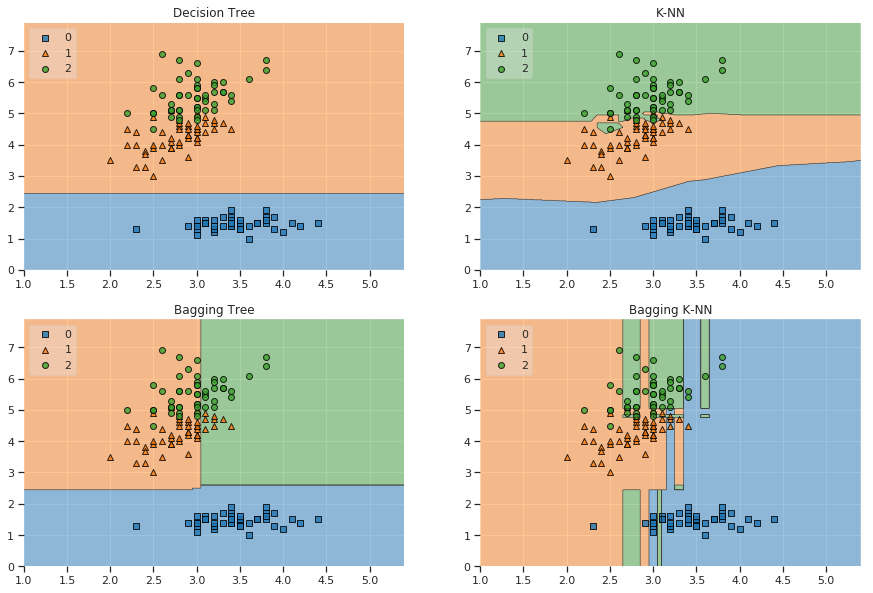

In [16]:
clf_label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [dt, knn, bagging_dt, bagging_knn]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat = 2)

for clf, label, grd in zip(clf_list, clf_label, grid):        
    scores = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) %s" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X, y = y, clf = clf, legend = 2)
    plt.title(label)

plt.show()

### Learning curves

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

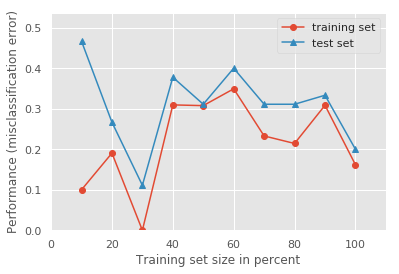

In [20]:
plot_learning_curves(X_train, y_train, X_test, y_test, bagging_dt, print_model = False, style = 'ggplot')
plt.show()

## Boosting
__Boosting__ refers to a family of algorithms that are able to convert __weak__ learners to __strong__ learners. The main principle of boosting is to __fit__ a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds.

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

Accuracy: 0.67 (+/- 0.00) AdaBoost (n_est=1)
Accuracy: 0.95 (+/- 0.05) AdaBoost (n_est=2)
Accuracy: 0.95 (+/- 0.05) AdaBoost (n_est=3)
Accuracy: 0.85 (+/- 0.15) AdaBoost (n_est=10)


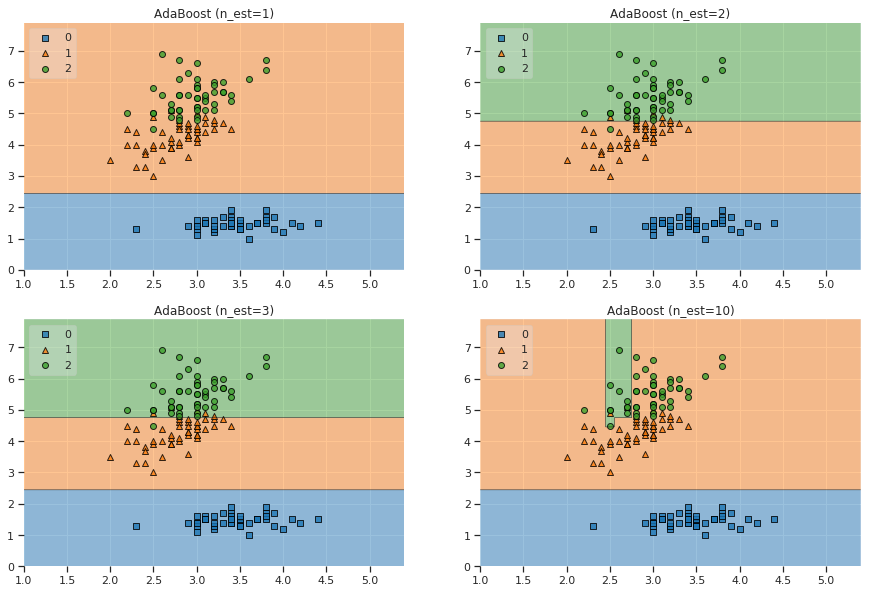

In [25]:
num_est = [1, 2, 3, 10]
label = ["AdaBoost (n_est=1)", "AdaBoost (n_est=2)", "AdaBoost (n_est=3)", "AdaBoost (n_est=10)"]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)   
    scores = cross_val_score(boosting, X, y, cv = 5, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) %s" %(scores.mean(), scores.std(), label))
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X, y = y, clf = boosting, legend = 2)
    plt.title(label)

plt.show()

__AdaBoost__ with `n_estimate` =  `2` and `3` gives more accurate results.

### Learning Curve

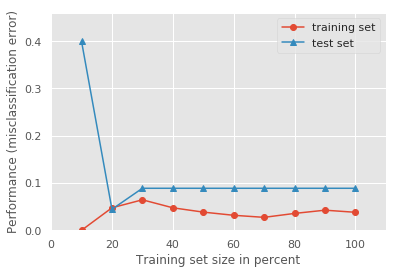

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = 2)

plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style='ggplot')
plt.show()

## Stacking
__Stacking__ is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on complete training set then the meta-model is trained on the outputs of base level model as features. 

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
rfc = RandomForestClassifier(random_state=1)
gnb = GaussianNB()
lr = LogisticRegression()

# stacking classifier
sclf = StackingClassifier(classifiers = [knn, rfc, gnb], meta_classifier = lr)

Accuracy: 0.91 (+/- 0.01) KNN
Accuracy: 0.91 (+/- 0.06) Random Forest
Accuracy: 0.92 (+/- 0.03) Naive Bayes
Accuracy: 0.95 (+/- 0.03) Stacking Classifier


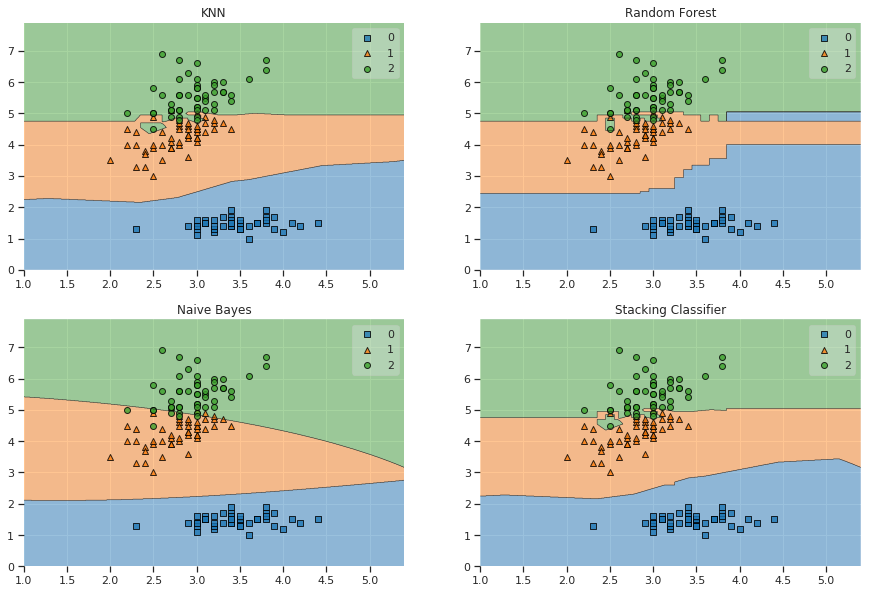

In [37]:
model_label = ["KNN", "Random Forest", "Naive Bayes", "Stacking Classifier"]
clf_list = [knn, rfc, gnb, sclf]
    
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []

for clf, label, grd in zip(clf_list, model_label, grid):
    scores = cross_val_score(clf, X, y, cv=3, scoring = "accuracy")
    print ("Accuracy: %.2f (+/- %.2f) %s" %(scores.mean(), scores.std(), label))
    
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X, y = y, clf = clf)
    plt.title(label)

plt.show()

### Classifiers Accuracy

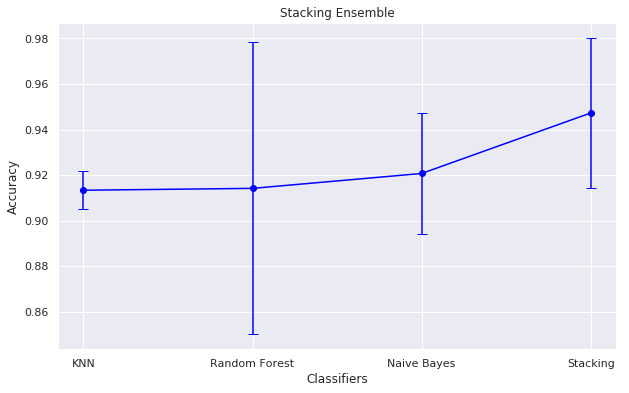

In [41]:
plt.figure(figsize=(10,6))
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr = clf_cv_std, c = 'blue', fmt= '-o', capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks(range(4), ["KNN", "Random Forest", "Naive Bayes", "Stacking"])        
plt.ylabel("Accuracy")
plt.xlabel("Classifiers");
plt.title("Stacking Ensemble");
plt.show()

### Learning Curve

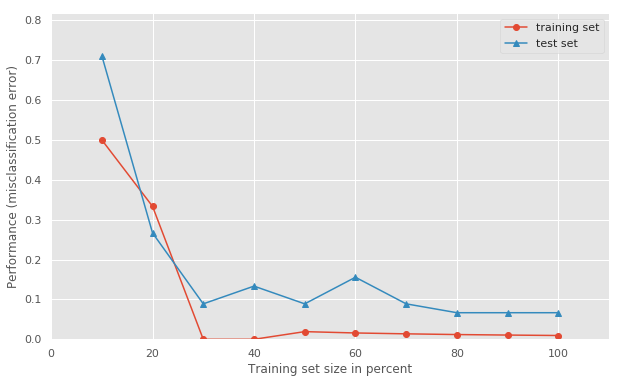

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
plt.figure(figsize=(10, 6))
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

## References:
* [Github](https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb)
* [Medium](https://blog.statsbot.co/ensemble-learning-d1dcd548e936)